In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
from seaborn import lmplot

In [2]:
import math
import matplotlib.cm as cm
import pandas as pd
import plotly.express as px
from matplotlib.pyplot import figure


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [4]:
df = pd.read_csv("interseccionDNormalizada.csv") #vejiga

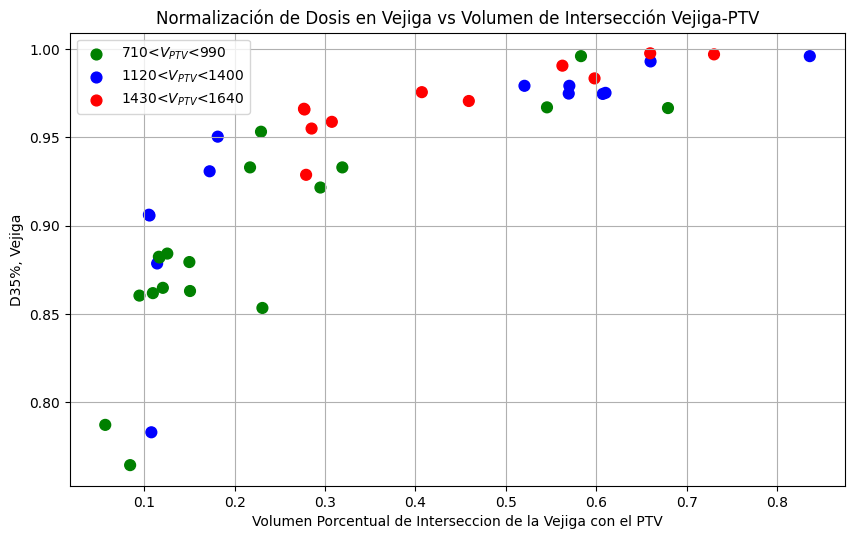

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Ivejiga_porcN'], df['Vejiga_D35N'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))
#clb =  plt.colorbar()
#clb.set_label('Prioridad', labelpad=-20, y=1.07, rotation=0)
#plt.hlines(y=95.4, xmin=4600, xmax=4700, label='95.4%', colors='green')
#plt.vlines(x=4627, ymin=95, ymax=96, label='4627 cGy',colors='blue')
plt.scatter(df['Ivejiga_porcN'][0], df['Vejiga_D35N'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['Ivejiga_porcN'][22], df['Vejiga_D35N'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['Ivejiga_porcN'][37], df['Vejiga_D35N'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')
plt.grid()
plt.title("Normalización de Dosis en Vejiga vs Volumen de Intersección Vejiga-PTV")
plt.xlabel("Volumen Porcentual de Interseccion de la Vejiga con el PTV")
plt.ylabel("D35%, Vejiga") #volumen del PTV
plt.legend(loc='best')
#plt.savefig('DosisInterseccionVejiga.eps', bbox_inches='tight')
#plt.savefig('DosisInterseccionVejiga.png', bbox_inches='tight')
plt.show()

In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x,c):
    f = 1/(1+np.exp(-c*x))

    return f

In [7]:
xdata = df['Ivejiga_porcN']
ydata = df['Vejiga_D35N']

Parameters [ 8.24109681 -0.11912842 -0.01597439]
RMSE: 0.026704112552556808
R-squared: 0.8181972404657979


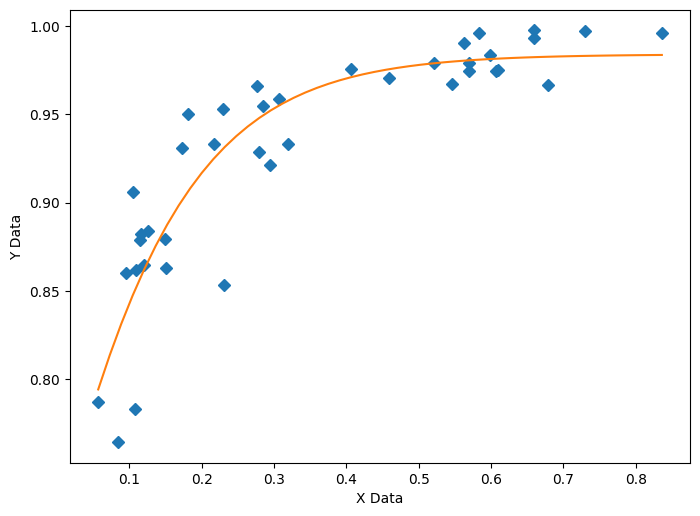

In [8]:
#tomado de stack overflow escribir enlace
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings


def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
    return  1 / (1.0 + numpy.exp(-a * (x-b))) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xdata, *parameterTuple)
    return numpy.sum((ydata - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xdata)
    minX = min(xdata)
    maxY = max(ydata)
    minY = min(ydata)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xdata, ydata, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xdata, *fittedParameters) 

absError = modelPredictions - ydata

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(ydata))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xdata, ydata,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xdata), max(xdata))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)



Parameters [ 8.24109681 -0.11912842 -0.01597439]
RMSE: 0.026704112552556808
R-squared: 0.8181972404657979


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


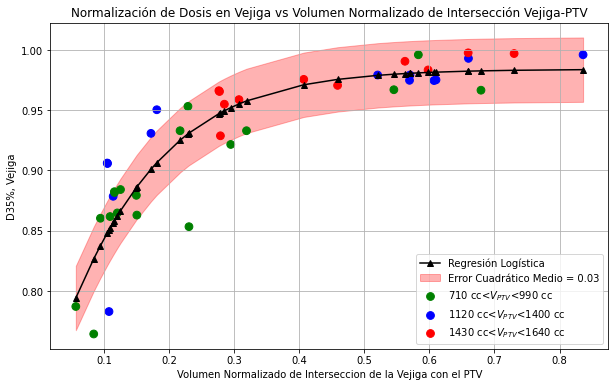

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

xdata = df['Ivejiga_porcN']
ydata = df['Vejiga_D35N']
y = func(xdata,  8.24109681, -0.11912842, -0.01597439)
########################################
print('Parameters', fittedParameters)

modelPredictions = func(xdata, *fittedParameters) 

absError = modelPredictions - ydata

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(ydata))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)


#figure(figsize=(10, 6), dpi=100)
plt.figure(figsize=(10,6))
plt.fill_between(np.sort(xdata), np.sort(y+RMSE), np.sort(y-RMSE),
                 color = 'r', alpha = 0.3, label='Error Cuadrático Medio = ' + str("{:.2f}".format(RMSE)))
plt.scatter(df['Ivejiga_porcN'], df['Vejiga_D35N'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))
#clb =  plt.colorbar()
#clb.set_label('Prioridad', labelpad=-20, y=1.07, rotation=0)
#plt.hlines(y=95.4, xmin=4600, xmax=4700, label='95.4%', colors='green')
#plt.vlines(x=4627, ymin=95, ymax=96, label='4627 cGy',colors='blue')
plt.scatter(df['Ivejiga_porcN'][0], df['Vejiga_D35N'][0], color=df["color"][0] , s=60,label='710 cc<$V_{PTV}$<990 cc')
plt.scatter(df['Ivejiga_porcN'][22], df['Vejiga_D35N'][22], color=df["color"][22] , s=60,label='1120 cc<$V_{PTV}$<1400 cc')
plt.scatter(df['Ivejiga_porcN'][37], df['Vejiga_D35N'][37], color=df["color"][37] , s=60,label='1430 cc<$V_{PTV}$<1640 cc')


############################################
plt.plot(np.sort(xdata), np.sort(y), 'k^-', label='Regresión Logística')
plt.grid()
plt.title("Normalización de Dosis en Vejiga vs Volumen Normalizado de Intersección Vejiga-PTV")
plt.xlabel("Volumen Normalizado de Interseccion de la Vejiga con el PTV")
plt.ylabel("D35%, Vejiga") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisInterseccionVejigaNormalizada.eps', bbox_inches='tight')
plt.savefig('DosisInterseccionVejigaNormalizada.png', bbox_inches='tight')
plt.show()
########################################


In [12]:
#Dosis normalizada respecto de la prescripción.
#Para describir los datos Se propone la función logística.
#referencia de incertezas
#https://aapm.onlinelibrary.wiley.com/doi/epdf/10.1002/acm2.12367
#Para la mayoria de casos en GT podemos cumplir al menos la restricción más permisiva del protocolo?


In [13]:
#AHORA PARA EL RECTO

In [14]:
xdata = df['Irecto_porcN']
ydata = df['Recto_D35N']

Parameters [ 5.04766787 -0.2121901   0.00724459]
RMSE: 0.030530585421273185
R-squared: 0.7823085801336046


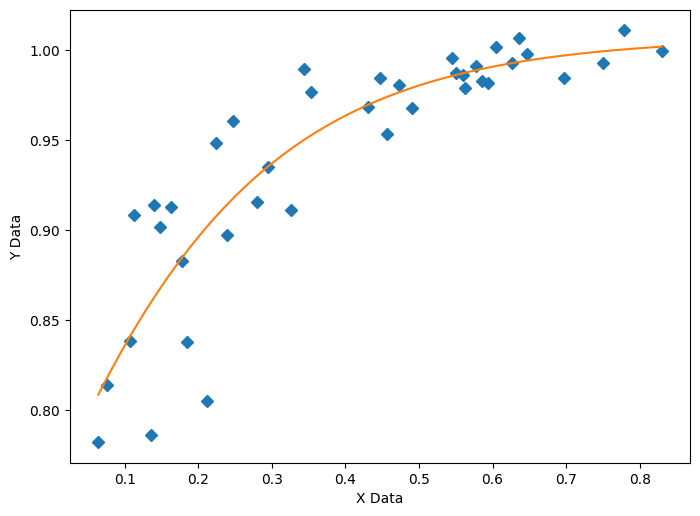

In [15]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings


def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
    return  1 / (1.0 + numpy.exp(-a * (x-b))) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xdata, *parameterTuple)
    return numpy.sum((ydata - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xdata)
    minX = min(xdata)
    maxY = max(ydata)
    minY = min(ydata)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xdata, ydata, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xdata, *fittedParameters) 

absError = modelPredictions - ydata

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(ydata))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xdata, ydata,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xdata), max(xdata))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [16]:
fittedParameters 

array([ 5.04766787, -0.2121901 ,  0.00724459])

In [17]:
np.array([ 8.24109681, -0.11912842, -0.01597439])

array([ 8.24109681, -0.11912842, -0.01597439])

Parameters [ 5.04766787 -0.2121901   0.00724459]
RMSE: 0.030530585421273185
R-squared: 0.7823085801336046


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


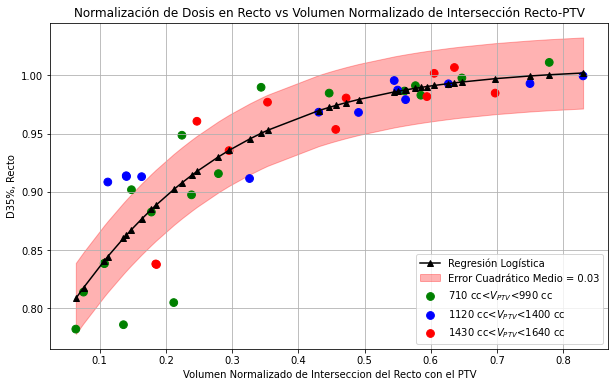

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

xdata = df['Irecto_porcN']
ydata = df['Recto_D35N']
y = func(xdata,  5.04766787, -0.2121901 ,  0.00724459)
########################################
print('Parameters', fittedParameters)

modelPredictions = func(xdata, *fittedParameters) 

absError = modelPredictions - ydata

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(ydata))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)


#figure(figsize=(10, 6), dpi=100)
plt.figure(figsize=(10,6))
plt.fill_between(np.sort(xdata), np.sort(y+RMSE), np.sort(y-RMSE),
                 color = 'r', alpha = 0.3, label='Error Cuadrático Medio = ' + str("{:.2f}".format(RMSE)))
##########################################

plt.scatter(df['Irecto_porcN'], df['Recto_D35N'], color=df["color"] , s=60)
plt.scatter(df['Irecto_porcN'][0], df['Recto_D35N'][0], color=df["color"][0] , s=60,label='710 cc<$V_{PTV}$<990 cc')
plt.scatter(df['Irecto_porcN'][22], df['Recto_D35N'][22], color=df["color"][22] , s=60,label='1120 cc<$V_{PTV}$<1400 cc')
plt.scatter(df['Irecto_porcN'][37], df['Recto_D35N'][37], color=df["color"][37] , s=60,label='1430 cc<$V_{PTV}$<1640 cc')

plt.plot(np.sort(xdata), np.sort(y), 'k^-', label='Regresión Logística')

plt.grid()
plt.title("Normalización de Dosis en Recto vs Volumen Normalizado de Intersección Recto-PTV")
plt.xlabel("Volumen Normalizado de Interseccion del Recto con el PTV")
plt.ylabel("D35%, Recto") #volumen del PTV
plt.legend(loc='lower right')
plt.savefig('DosisInterseccionRectoNormalizada.eps', bbox_inches='tight')
plt.savefig('DosisInterseccionRectoNormalizada.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


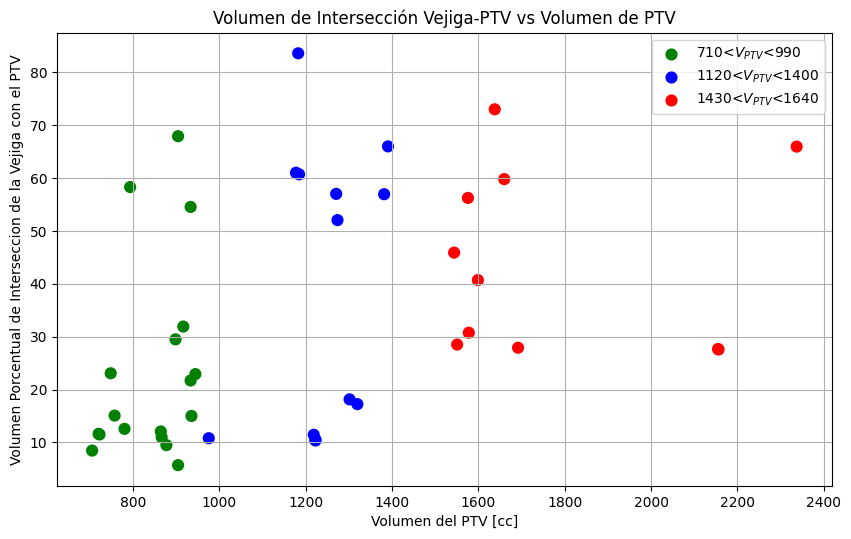

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Ivejiga_porc'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Ivejiga_porc'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Ivejiga_porc'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Ivejiga_porc'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Volumen de Intersección Vejiga-PTV vs Volumen de PTV")
plt.ylabel("Volumen Porcentual de Interseccion de la Vejiga con el PTV")
plt.xlabel("Volumen del PTV [cc]") #volumen del PTV
plt.legend(loc='best')
plt.savefig('VolumenInterseccionVejiga.eps', bbox_inches='tight')
plt.savefig('VolumenInterseccionVejiga.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


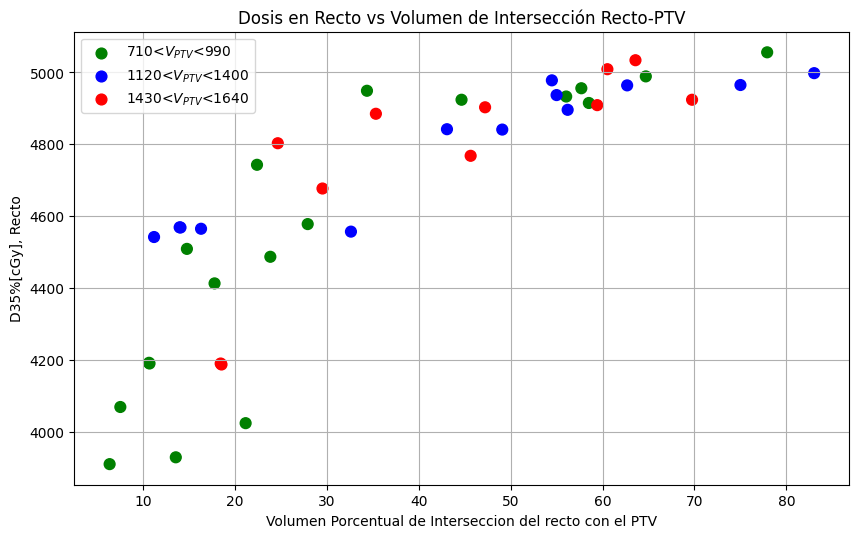

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Irecto_porc'], df['Recto_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))
plt.scatter(df['Irecto_porc'][0], df['Recto_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['Irecto_porc'][22], df['Recto_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['Irecto_porc'][37], df['Recto_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Recto vs Volumen de Intersección Recto-PTV")
plt.xlabel("Volumen Porcentual de Interseccion del recto con el PTV")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisInterseccionRecto.eps', bbox_inches='tight')
plt.savefig('DosisInterseccionRecto.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


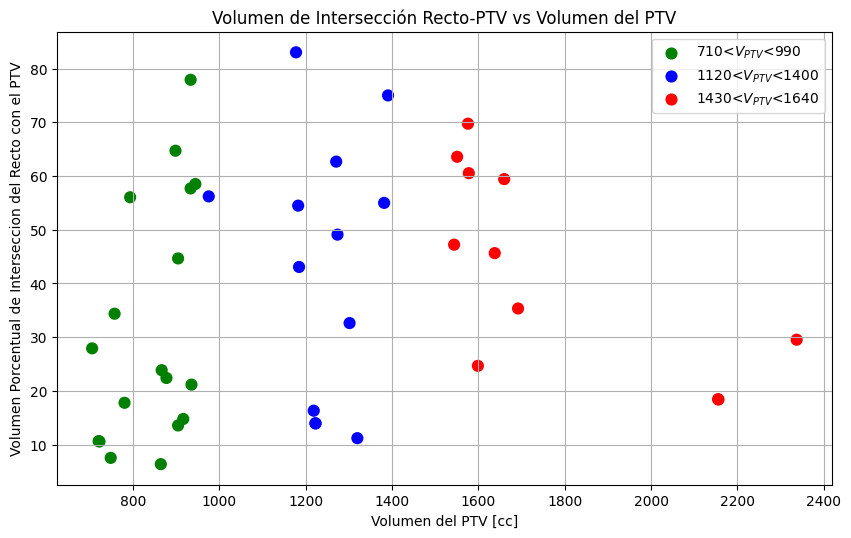

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Irecto_porc'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Irecto_porc'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Irecto_porc'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Irecto_porc'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Volumen de Intersección Recto-PTV vs Volumen del PTV")
plt.ylabel("Volumen Porcentual de Interseccion del Recto con el PTV")
plt.xlabel("Volumen del PTV [cc]") #volumen del PTV
plt.legend(loc='best')
plt.savefig('VolumenInterseccionRecto.eps', bbox_inches='tight')
plt.savefig('VolumenInterseccionRecto.png', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


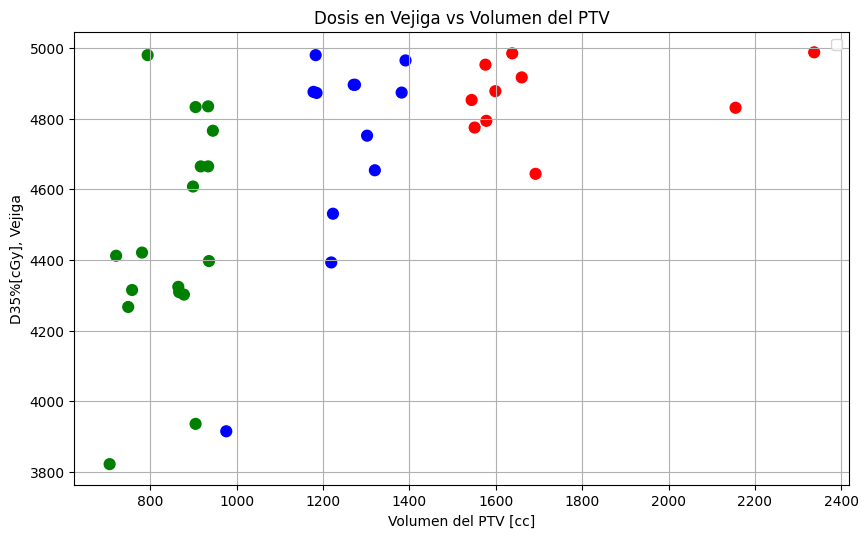

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Vejiga_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

#plt.scatter(df['Ivejiga_porc'][0], df['Vejiga_D35'][0], color=df["color"][0] , s=60,label='710<V<990')
#plt.scatter(df['Ivejiga_porc'][22], df['Vejiga_D35'][22], color=df["color"][22] , s=60,label='1120<V<1400')
#plt.scatter(df['Ivejiga_porc'][37], df['Vejiga_D35'][37], color=df["color"][37] , s=60,label='1430<V<1640')

plt.grid()
plt.title("Dosis en Vejiga vs Volumen del PTV")
plt.xlabel("Volumen del PTV [cc]")
plt.ylabel("D35%[cGy], Vejiga") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisVolumenPTV_Vejiga.eps', bbox_inches='tight')
plt.savefig('DosisVolumenPTV_Vejiga.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


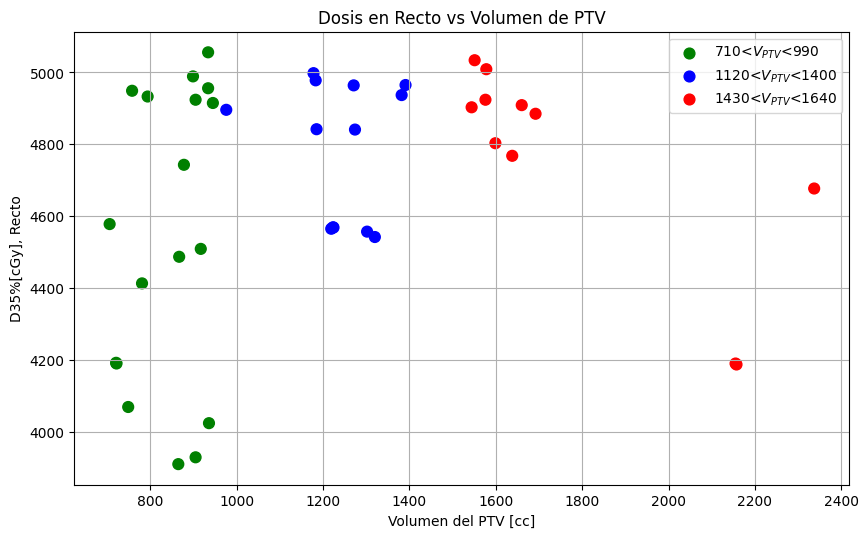

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['volPTV'], df['Recto_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['volPTV'][0], df['Recto_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['volPTV'][22], df['Recto_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['volPTV'][37], df['Recto_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Recto vs Volumen de PTV")
plt.xlabel("Volumen del PTV [cc]")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisVolumenPTV_Recto.eps', bbox_inches='tight')
plt.savefig('DosisVolumenPTV_Recto.png', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


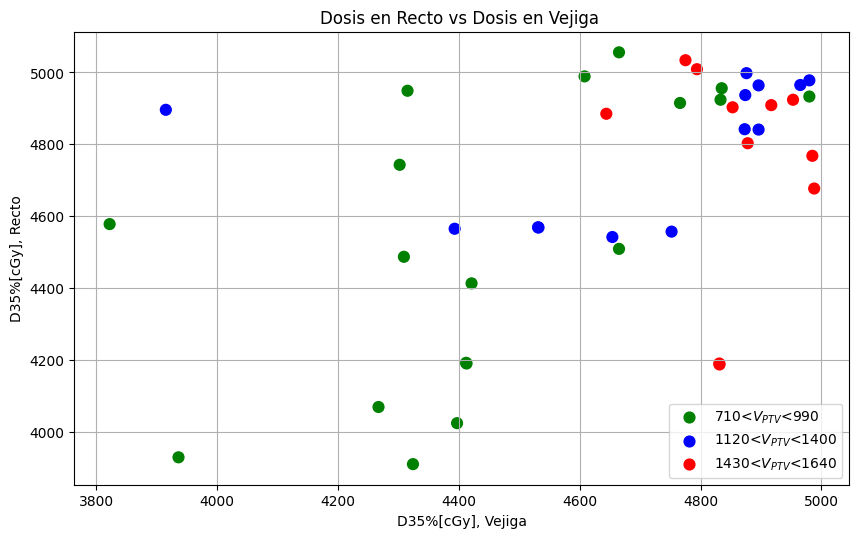

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Vejiga_D35'], df['Recto_D35'], color=df["color"] , s=60)#, s=np.power((dfR['D35%']/1000),(5*dfR['D35%']/10000)))

plt.scatter(df['Vejiga_D35'][0], df['Recto_D35'][0], color=df["color"][0] , s=60,label='710<$V_{PTV}$<990')
plt.scatter(df['Vejiga_D35'][22], df['Recto_D35'][22], color=df["color"][22] , s=60,label='1120<$V_{PTV}$<1400')
plt.scatter(df['Vejiga_D35'][37], df['Recto_D35'][37], color=df["color"][37] , s=60,label='1430<$V_{PTV}$<1640')

plt.grid()
plt.title("Dosis en Recto vs Dosis en Vejiga ")
plt.xlabel("D35%[cGy], Vejiga")
plt.ylabel("D35%[cGy], Recto") #volumen del PTV
plt.legend(loc='best')
plt.savefig('DosisRecto_Vejiga.eps', bbox_inches='tight')
plt.savefig('DosisRecto_Vejiga.png', bbox_inches='tight')
plt.show()